In [1]:
import ROOT
import math
ROOT.gStyle.SetOptStat(0)

Welcome to JupyROOT 6.12/06


- run008 for the noise, run020 for the injected signal
- run008: use h_8_2_0_4
- run020: use h_20_7_0_4

In [2]:
f = ROOT.TFile('/Users/yuntse/Data/icarus/data/vst/output_waveforms_run008.root')
h = f.Get('view/h_8_2_0_4')

In [3]:
wf = h.ProjectionY('Channel9',10,10)

In [4]:
c = ROOT.TCanvas('Board4Ch9', 'Board4Ch9', 2000, 1200)

Info in <TCanvas::Print>: png file NoiseWaveform.png has been created


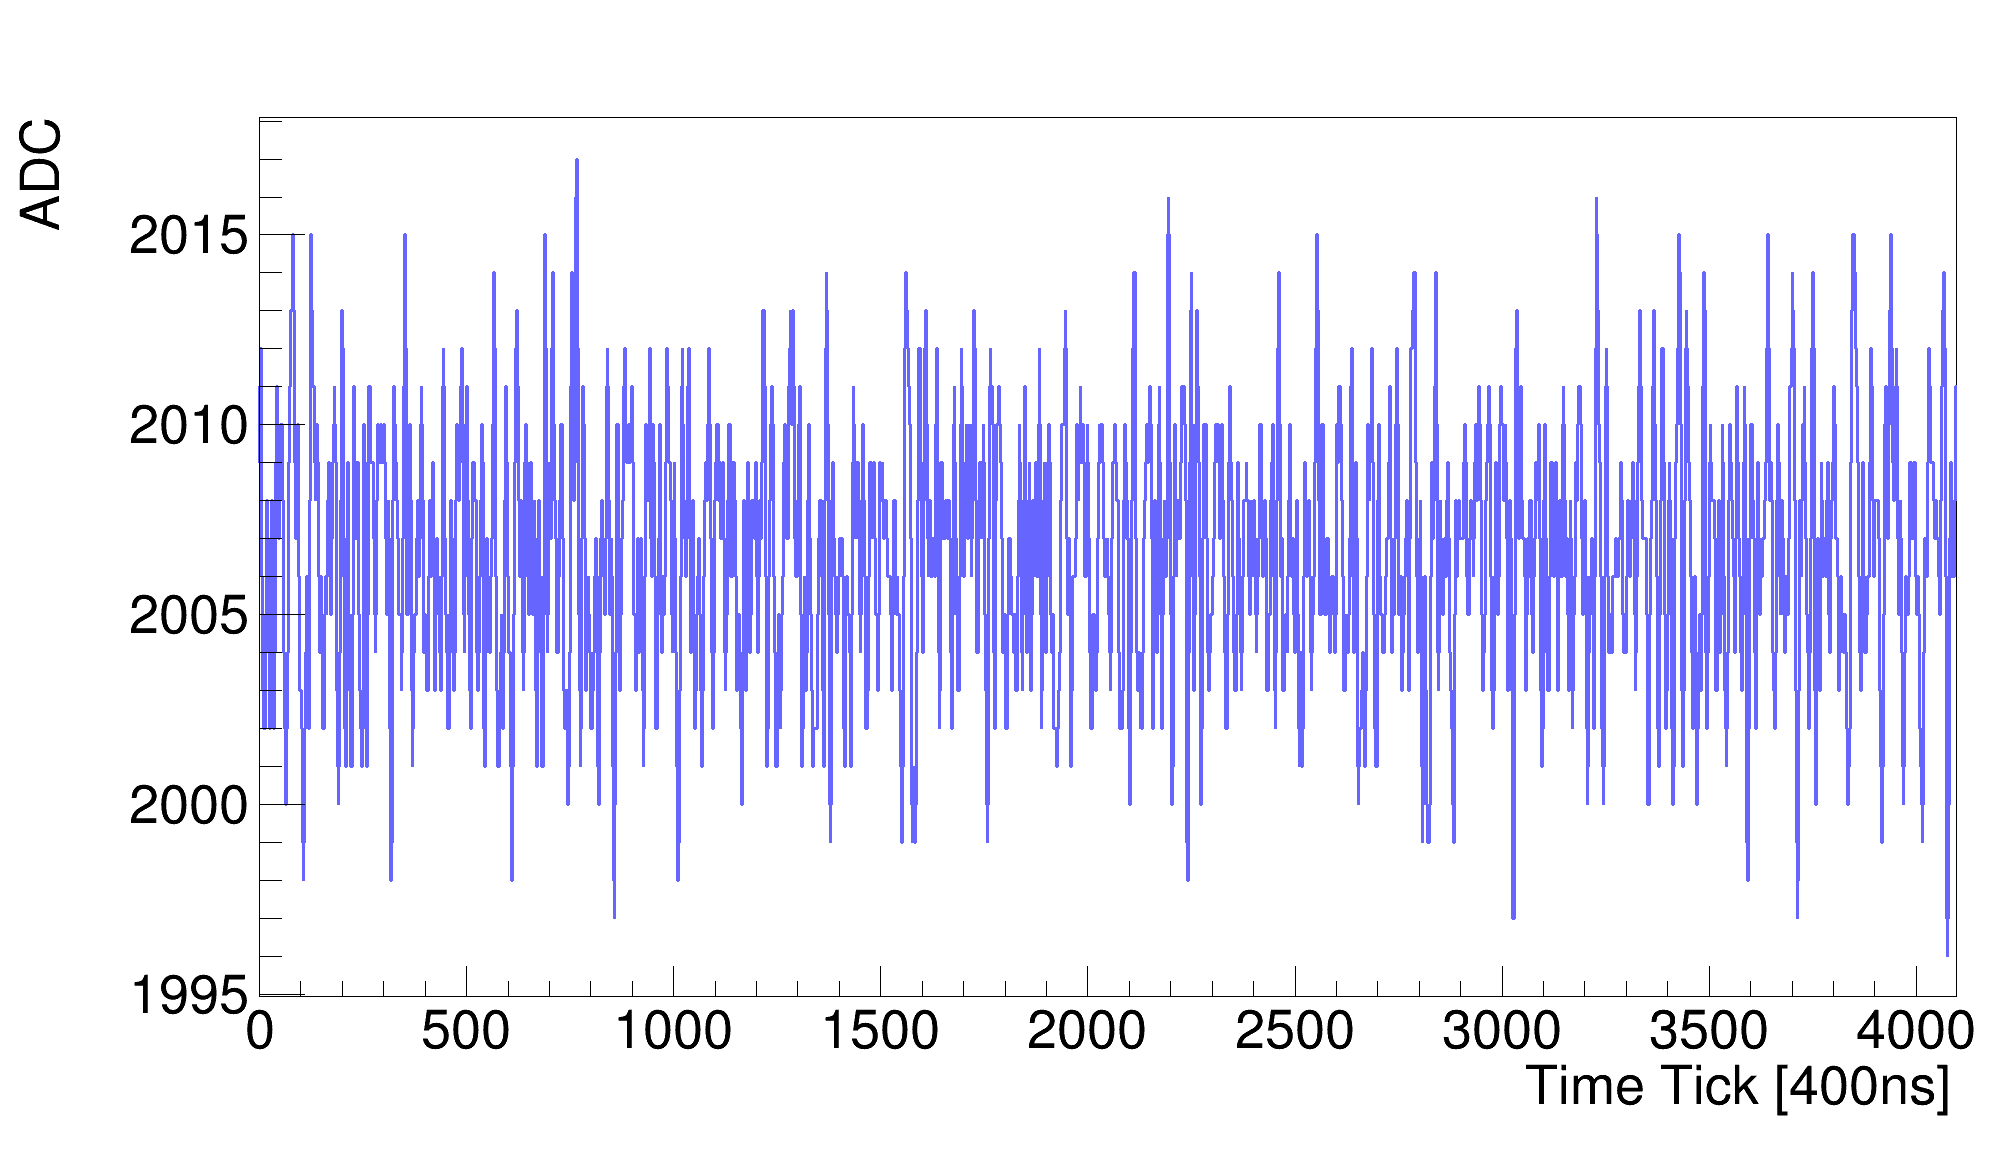

In [5]:
c.SetBottomMargin(0.15)
c.SetLeftMargin(0.13)
c.SetRightMargin(0.02)
wf.SetTitle('')
wf.GetXaxis().SetTitle('Time Tick [400ns]')
wf.GetXaxis().SetTitleSize(0.05)
wf.GetXaxis().SetLabelSize(0.05)
wf.GetYaxis().SetTitle('ADC')
wf.GetYaxis().SetTitleSize(0.05)
wf.GetYaxis().SetLabelSize(0.05)
wf.SetLineColor(593)
wf.SetLineWidth(3)
wf.Draw()
c.Draw()
c.SaveAs('NoiseWaveform.png')

In [6]:
v = 0.
v2 = 0.
n = wf.GetNbinsX()
print 'n: %d' %n
for i in xrange(1, n+1 ):
    vi = wf.GetBinContent(i)
    v += vi
    v2 += vi*vi
v /= float(n)
v2 /= float(n)
rms = math.sqrt( max (v2-v*v, 0))
print 'baseline: %f' % v
print 'rms:      %f' % rms

n: 4096
baseline: 2006.572998
rms:      3.266790


In [7]:
from numpy import fft
import numpy
import math
from matplotlib import pyplot

In [8]:
T = 0.4e-6*n
data = numpy.empty([0,1], float)
for i in xrange( 1, n+1 ):
    data = numpy.append( data, wf.GetBinContent(i)-v)

In [9]:
round5 = lambda v: round(v, 5)
round5array = lambda a: numpy.array(list(map(round5, a)))

In [10]:
data

array([2.42700195, 4.42700195, 5.42700195, ..., 1.42700195, 3.42700195,
       4.42700195])

In [11]:
data_ft = numpy.fft.rfft(data[:-1])
round5array(data_ft)

/Users/yuntse/Source/products/larsoft/python/v2_7_14b/Darwin64bit+16/lib/python2.7/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


array([ -4.427  ,  34.62744, 278.76037, ...,  -3.82899,   3.89426,
        14.40347])

In [12]:
coeff = abs(data_ft) / (float(n) / 2)
round5array(coeff)

array([0.00216, 0.05584, 0.14658, ..., 0.00498, 0.00515, 0.00731])

In [13]:
freq = numpy.fft.rfftfreq(len(data[:-1])) * (n / T)
freq

array([0.00000000e+00, 6.10500611e+02, 1.22100122e+03, ...,
       1.24847375e+06, 1.24908425e+06, 1.24969475e+06])

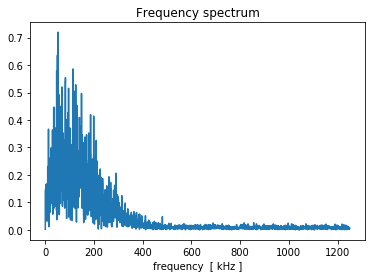

In [17]:
pyplot.plot(freq/1000, coeff, drawstyle="steps")
pyplot.title("Frequency spectrum")
pyplot.xlabel("frequency  [ kHz ]")
pyplot.show()

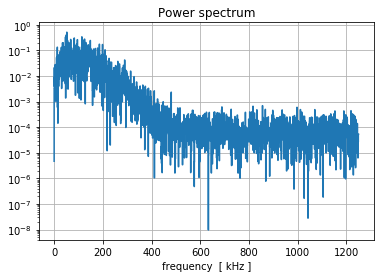

In [18]:
fig = pyplot.figure(clear=True)
pyplot.plot(freq/1000, coeff**2, figure=fig, drawstyle="steps")
pyplot.title("Power spectrum")
pyplot.xlabel("frequency  [ kHz ]")
pyplot.yscale('log')
pyplot.grid(True)
pyplot.show()
fig.savefig("PowerSpectrumNoise_run008_Board4Ch9.pdf")